In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('./insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

le.fit(data.sex.drop_duplicates())
data.sex=le.transform(data.sex)

le.fit(data.smoker.drop_duplicates())
data.smoker=le.transform(data.smoker)

le.fit(data.region.drop_duplicates())
data.region=le.transform(data.region)

In [9]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

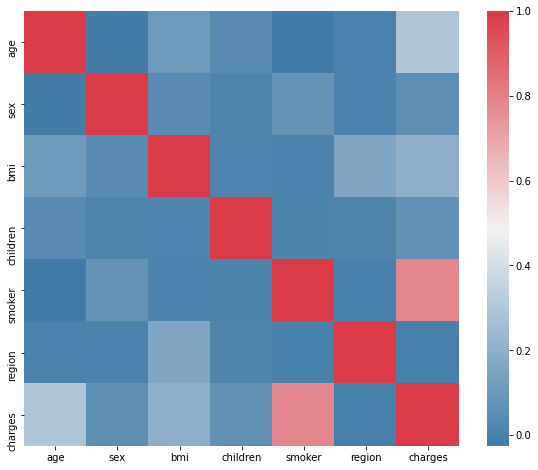

In [11]:
f, ax=plt.subplots(figsize=(10, 8))
corr=data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, ax=ax)

Text(0.5, 1.0, 'Distrbution of charges for non-smokers')

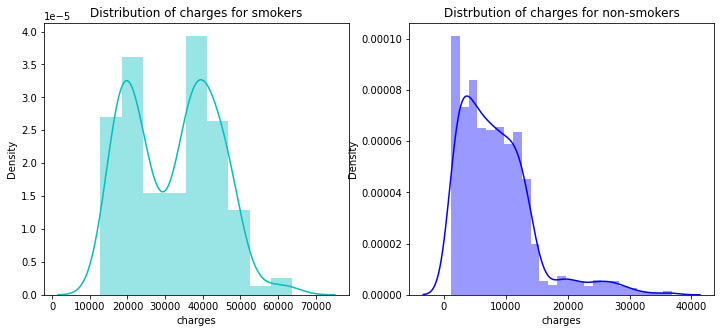

In [24]:
f=plt.figure(figsize=(12, 5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker==1)]['charges'], color='c', ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker==0)]['charges'], color='b', ax=ax)
ax.set_title('Distrbution of charges for non-smokers')

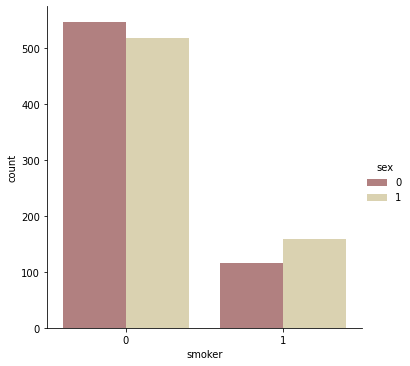

In [26]:
sns.catplot(x='smoker', kind='count', hue='sex', palette='pink', data=data)

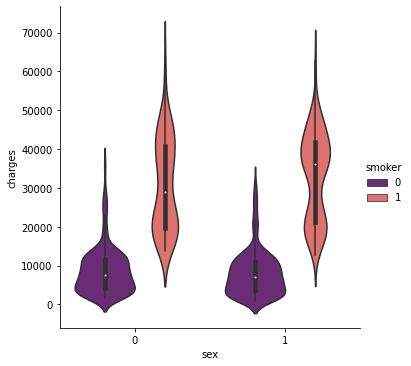

In [27]:
sns.catplot(x='sex', y='charges', hue='smoker', kind='violin', data=data, palette='magma')

<AxesSubplot:title={'center':'Box Plot for Charges of Women'}, xlabel='charges', ylabel='smoker'>

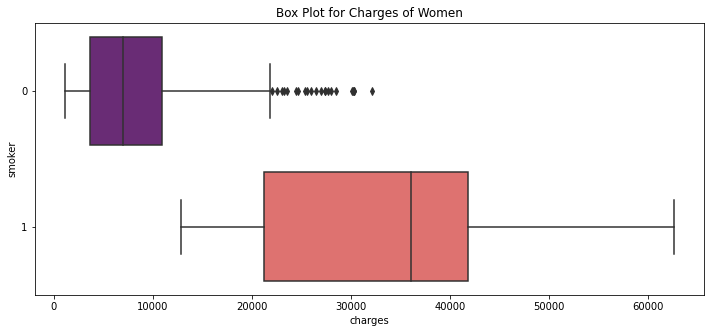

In [28]:
plt.figure(figsize=(12, 5))
plt.title('Box Plot for Charges of Women')
sns.boxplot(y='smoker', x='charges', data=data[(data.sex==1)], orient='h', palette='magma')

<AxesSubplot:title={'center':'Box Plot for Charges of Men'}, xlabel='charges', ylabel='smoker'>

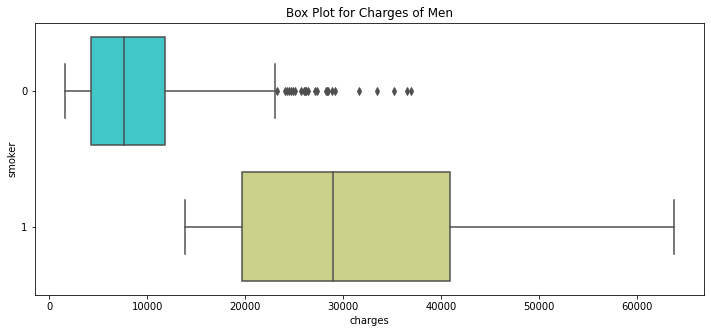

In [30]:
plt.figure(figsize=(12, 5))
plt.title('Box Plot for Charges of Men')
sns.boxplot(y='smoker', x='charges', data=data[(data.sex==0)], orient='h', palette='rainbow')

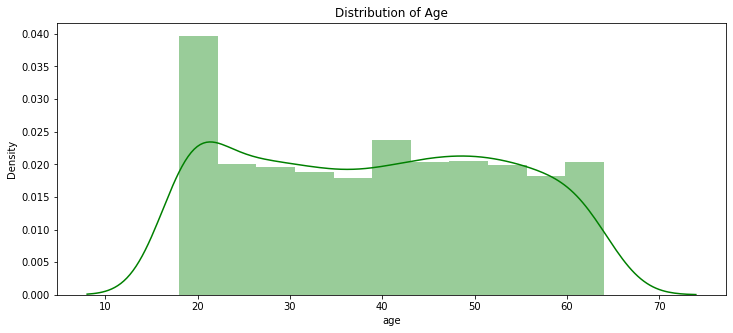

In [31]:
plt.figure(figsize=(12, 5))
plt.title('Distribution of Age')
ax=sns.distplot(data['age'], color='g')

Text(0.5, 1.0, 'The Number of Smokers and Non-Smokers (18yo)')

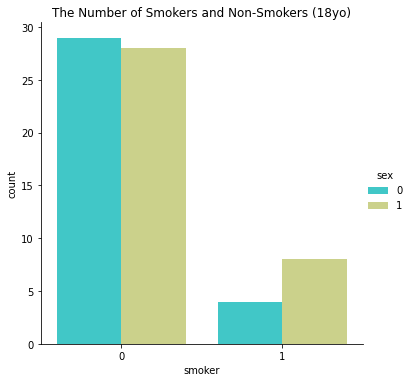

In [32]:
sns.catplot(x='smoker', kind='count', hue='sex', palette='rainbow', data=data[(data.age==18)])
plt.title('The Number of Smokers and Non-Smokers (18yo)')

<AxesSubplot:title={'center':'Box Plor for Charges 18yo Old Smokers'}, xlabel='charges', ylabel='smoker'>

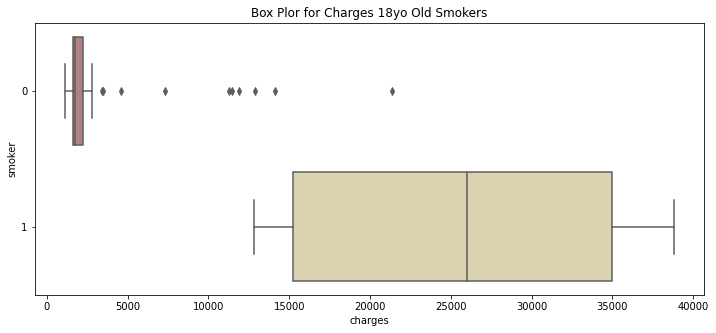

In [33]:
plt.figure(figsize=(12, 5))
plt.title('Box Plor for Charges 18yo Old Smokers')
sns.boxplot(y='smoker', x='charges', data=data[(data.age==18)], orient='h', palette='pink')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

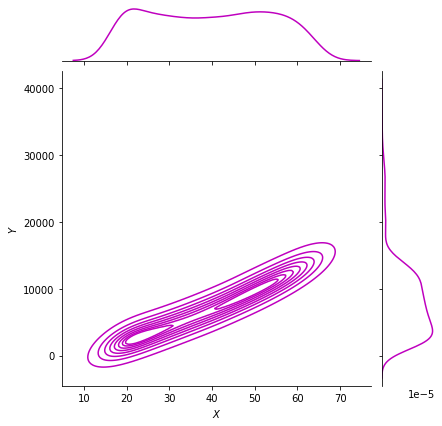

In [36]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

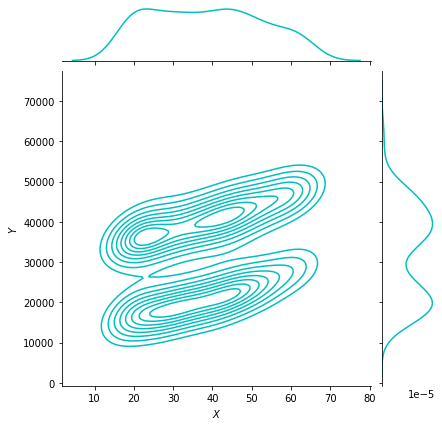

In [38]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [39]:
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [40]:
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

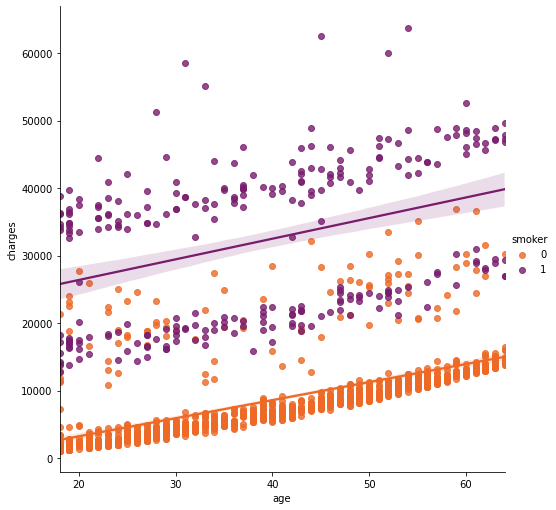

In [41]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

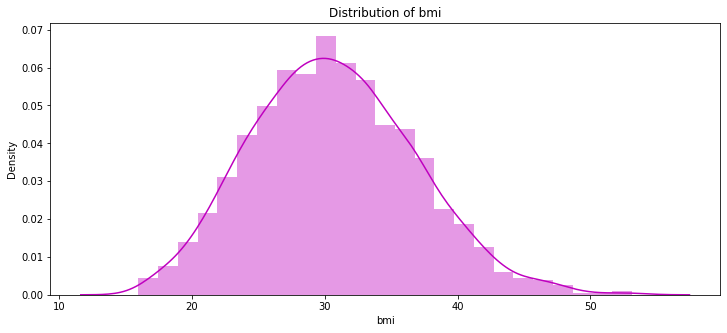

In [43]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

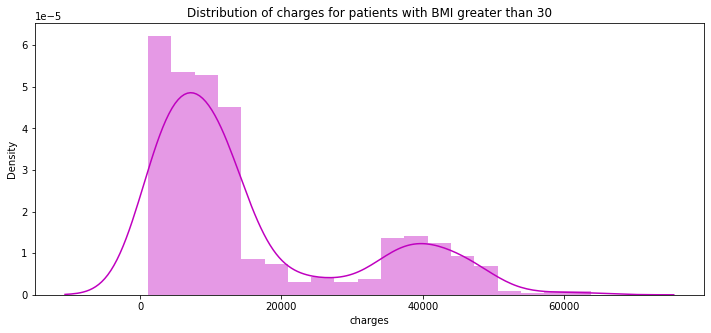

In [44]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

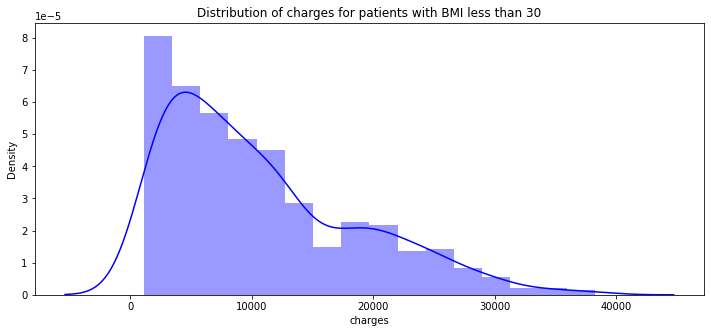

In [45]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

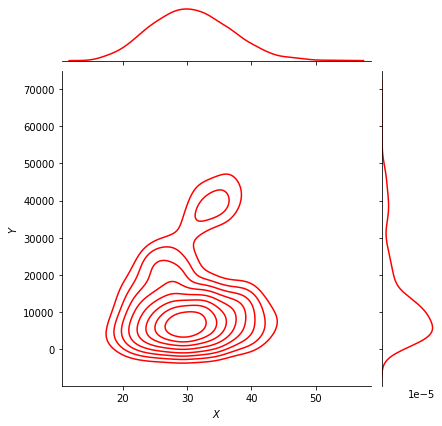

In [46]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

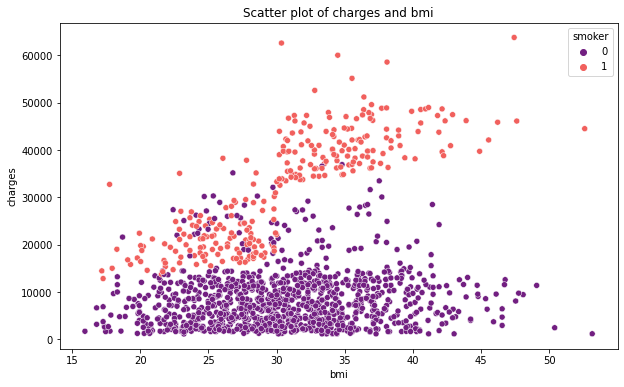

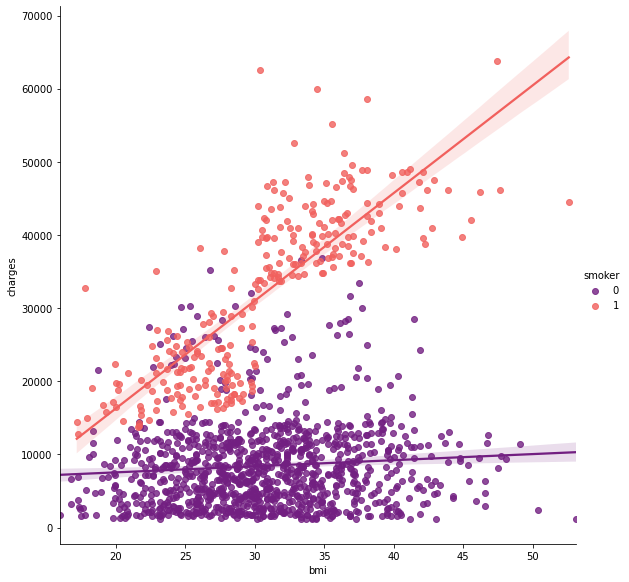

In [47]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

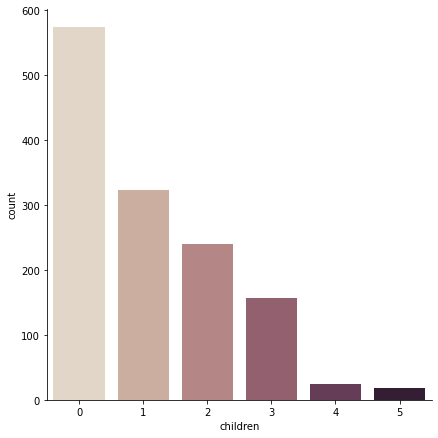

In [48]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

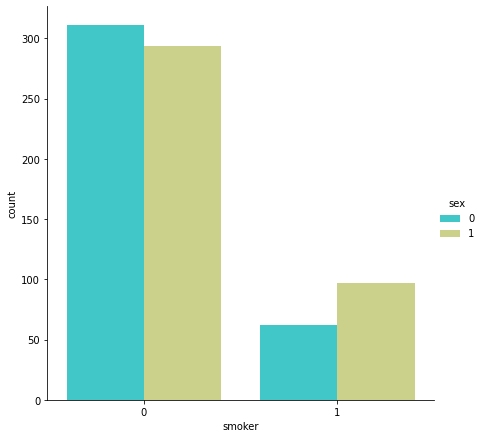

In [49]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [56]:
y=data.charges
X=data.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)
lr=LinearRegression().fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

print(lr.score(X_test, y_test))

0.799874714544996


In [60]:
X=data.drop(['charges', 'region'], axis=1)
y=data.charges

quad=PolynomialFeatures(degree=2)
X_quad=quad.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X_quad, y, test_size=0.2, random_state=0)
plr=LinearRegression().fit(X_train, y_train)

y_train_pred=plr.predict(X_train)
y_test_pred=plr.predict(X_test)

print(plr.score(X_test, y_test))

0.8808682351226939


In [63]:
rf_reg = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
rf_reg.fit(X_train,y_train)
rf_reg_train_pred = rf_reg.predict(X_train)
rf_reg_test_pred = rf_reg.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,rf_reg_train_pred),
mean_squared_error(y_test,rf_reg_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,rf_reg_train_pred),
r2_score(y_test,rf_reg_test_pred)))

MSE train data: 3824850.635, MSE test data: 20323351.343
R2 train data: 0.973, R2 test data: 0.872


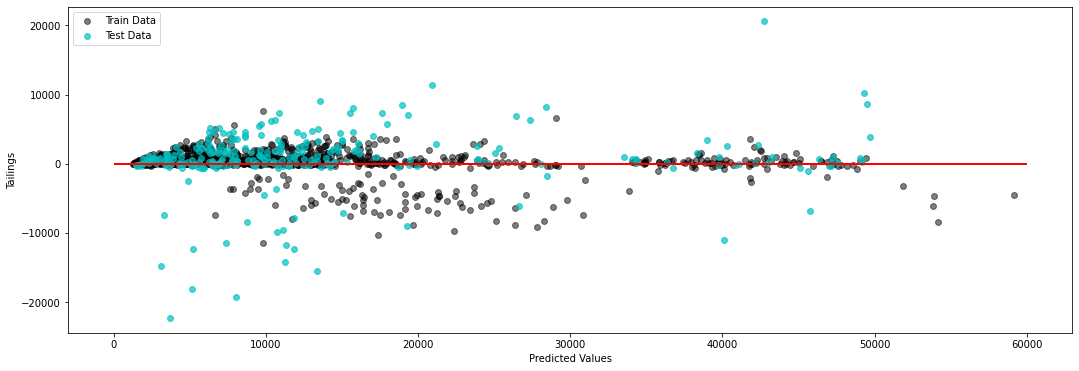

In [67]:
plt.figure(figsize=(18, 6))
plt.scatter(rf_reg_train_pred, rf_reg_train_pred-y_train, c='black', marker='o', s=35, alpha=0.5, label='Train Data')
plt.scatter(rf_reg_test_pred, rf_reg_test_pred-y_test, c='c', marker='o', s=35, alpha=0.7, label='Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Tailings')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=60000, lw=2, color='red')
plt.show()